<a href="https://colab.research.google.com/github/Swapnadeepgit/Data_Analytics/blob/main/CarPrice_predictive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SWAPNADEEP GHOSH , Data Science intern at Oyasis Infobyte

TASK NO.3 - The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car , horsepowers and the mileage it gives and many more . Car price prediction is one of the major researches in the machine learning .So if u want to learn how to trsain a car price prediction model the project is for you . (the given problem statement)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing the dataset
data = pd.read_csv('/content/car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data.dtypes
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
data.isnull().sum()#no missing values no data cleaning

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

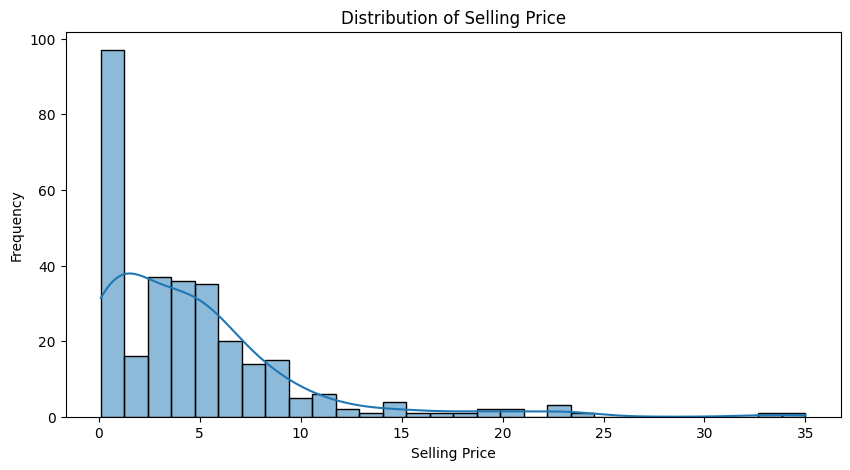

In [ ]:
#visualise the distribution of the target variable (Selling_Price)
plt.figure(figsize=(10,5))
sns.histplot(data['Selling_Price'],bins=30, kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


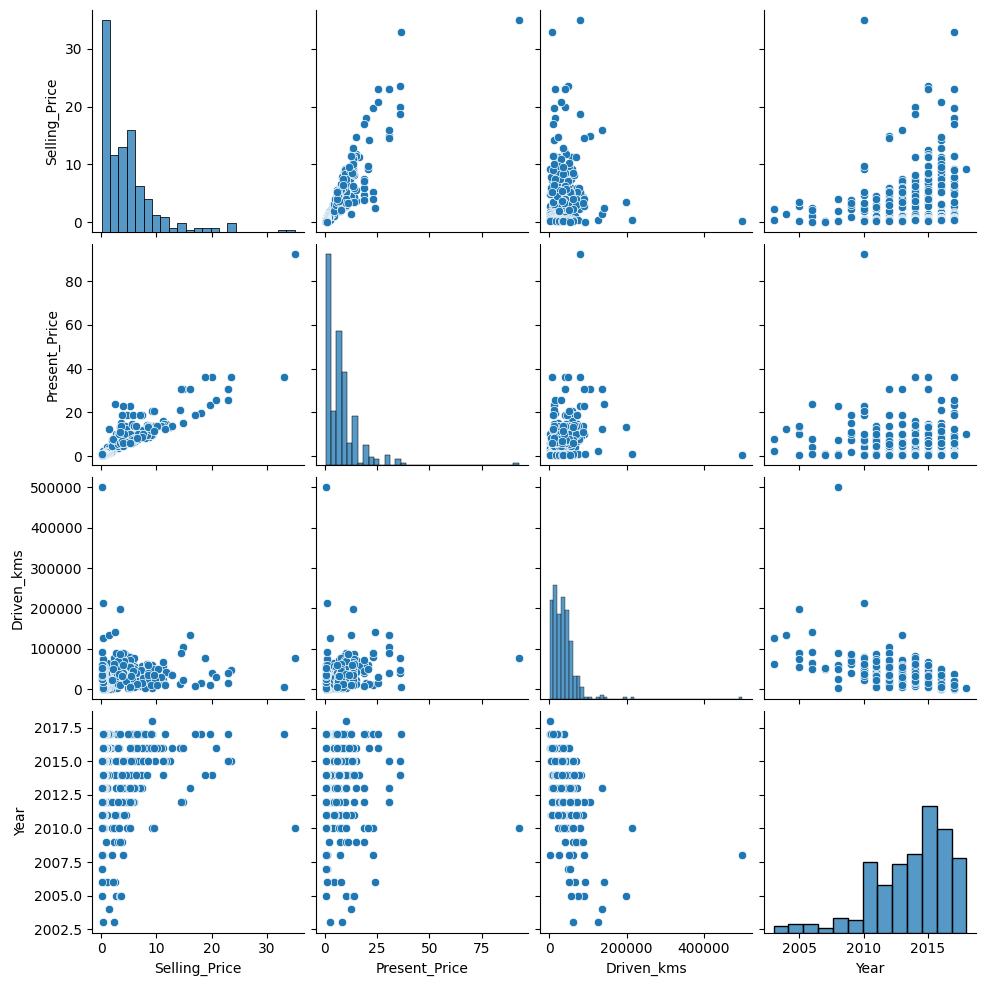

In [ ]:
sns.pairplot(data, vars=['Selling_Price', 'Present_Price', 'Driven_kms', 'Year'],palette = 'Dark2')
plt.show()

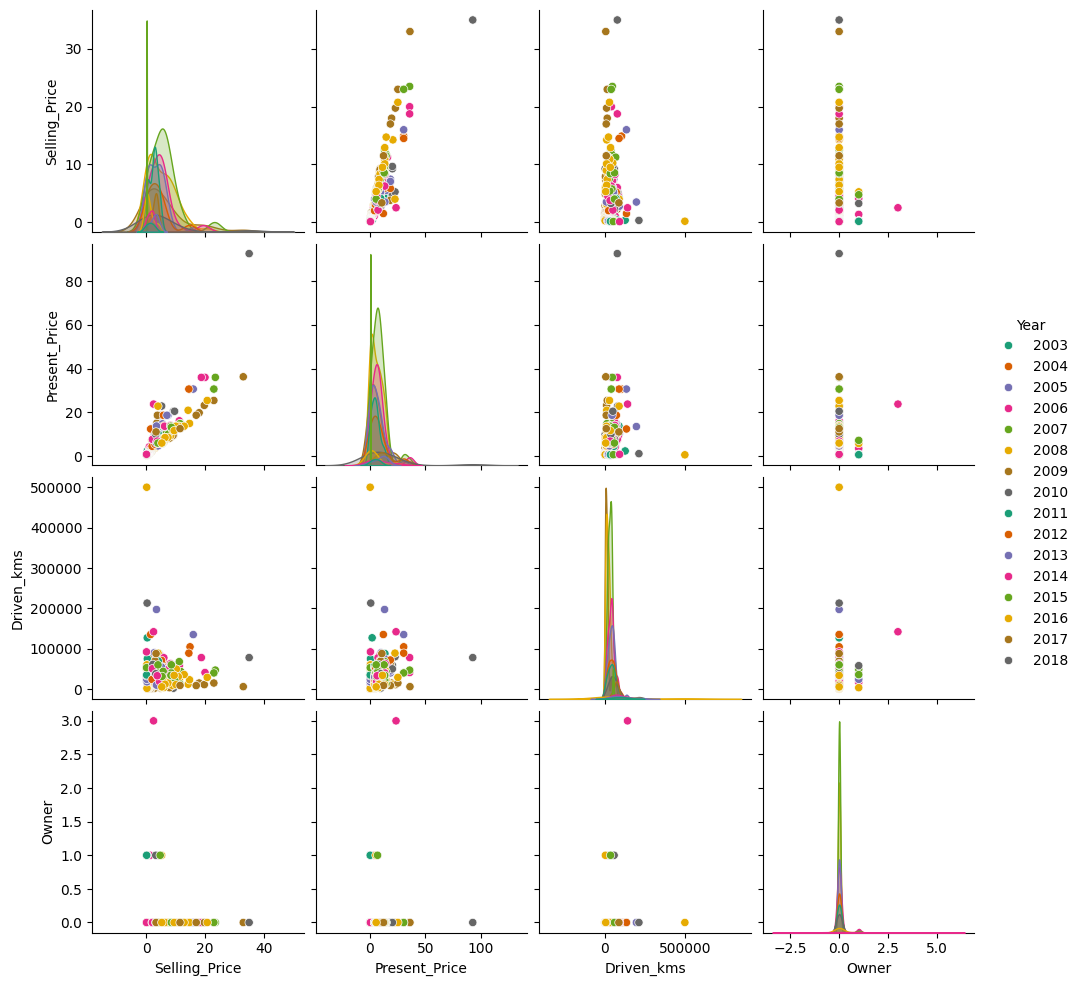

In [ ]:
sns.pairplot(data,hue='Year',palette='Dark2')
plt.show()

In [ ]:
data.columns


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
data.corr(numeric_only=True)

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


In [ ]:
#creating a correalation matrix with only numeric_only column
corr_matrix = data.corr(numeric_only=True)
corr_matrix


,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


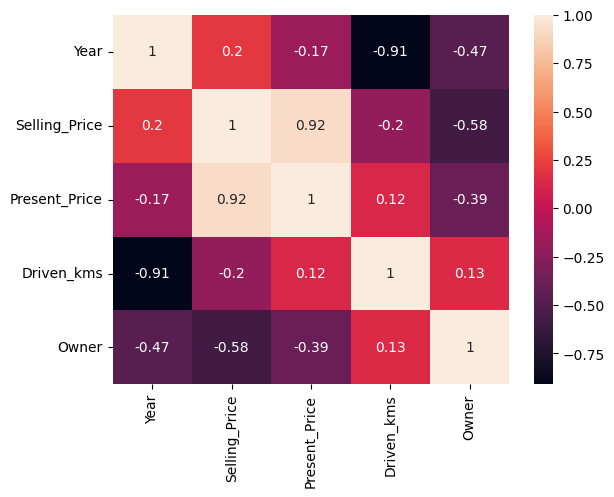

In [ ]:
# prompt: Using dataframe corr_matrix: heatmap

import seaborn as sns
import matplotlib.pyplot as plt
corr = corr_matrix.corr()
sns.heatmap(corr, annot=True)
plt.show()


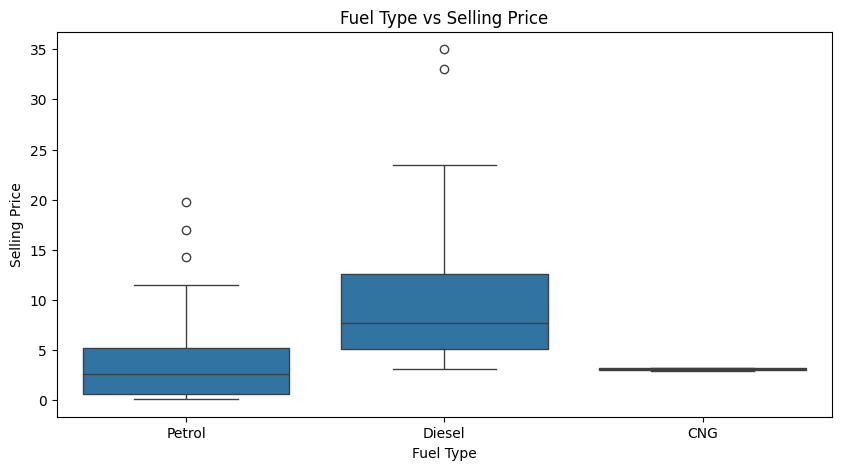

In [ ]:
#box plot for categorical variables
plt.figure(figsize=(10,5))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data)
plt.title('Fuel Type vs Selling Price')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()

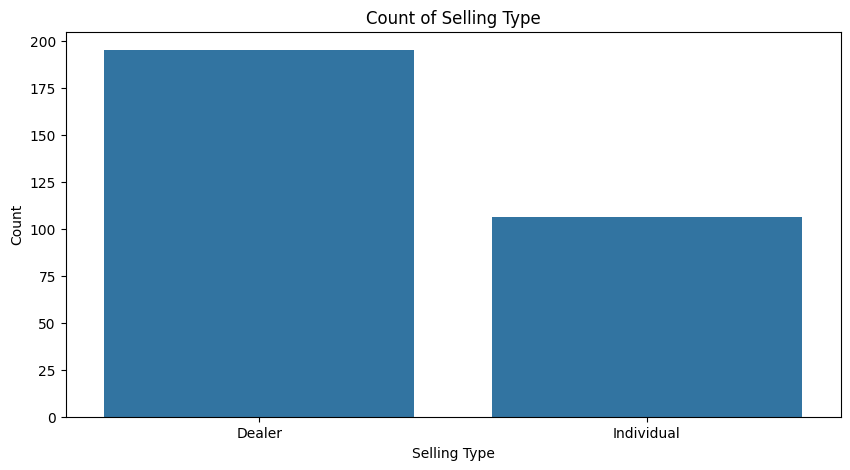

In [ ]:
#count plot for categorical variables
plt.figure(figsize=(10,5))
sns.countplot(x='Selling_type', data=data)
plt.title('Count of Selling Type')
plt.xlabel('Selling Type')
plt.ylabel('Count')
plt.show()

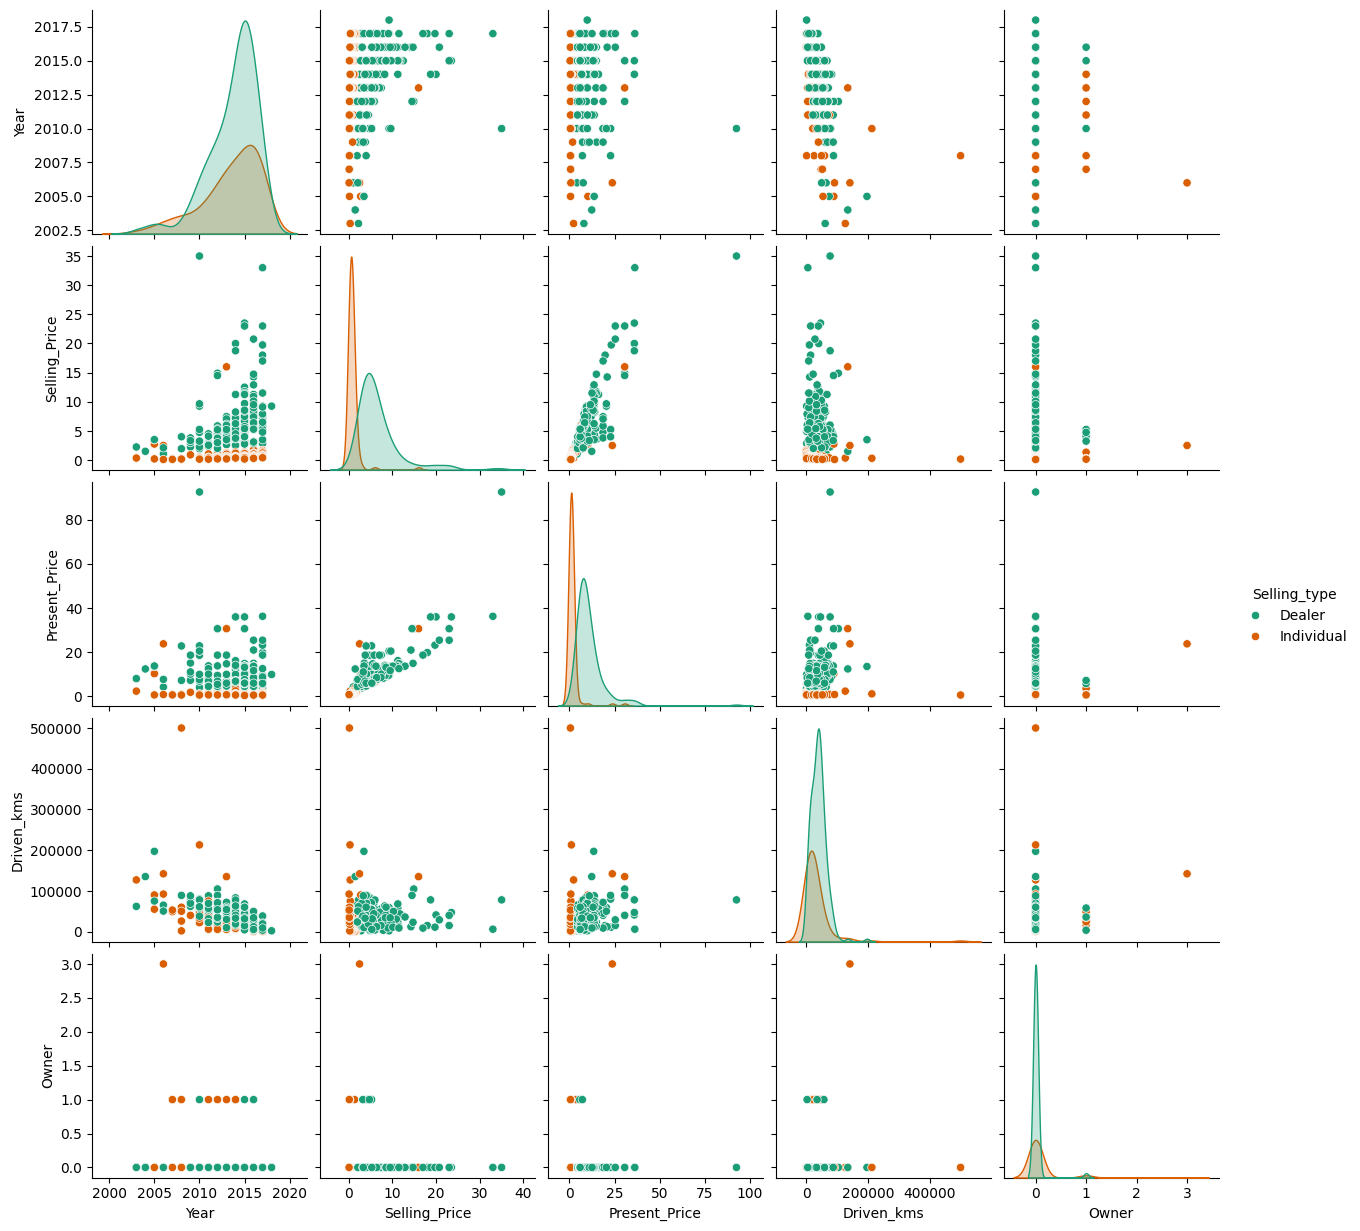

In [ ]:
sns.pairplot(data,hue='Selling_type',palette='Dark2')
plt.show()

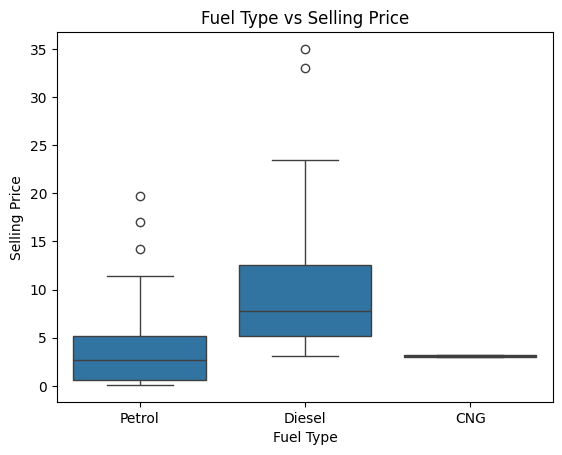

In [ ]:
#Example for fuel type
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data)
plt.title('Fuel Type vs Selling Price')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor


In [ ]:
from re import X
features = [ 'Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
target = ['Selling_Price']
x=data[features]
y=data[target]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
numeric_features = ['Year', 'Present_Price', 'Driven_kms']
numeric_features_transformer = Pipeline([
    ('scaler', MinMaxScaler())
])

categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
categorical_features_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numeric_features', numeric_features_transformer, numeric_features),
    ('categorical_features', categorical_features_transformer, categorical_features)
])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_features',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Year', 'Present_Price',
                                                   'Driven_kms']),
                                                 ('categorical_features',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Fuel_Type', 'Selling_type',
                                                   'Transmission',
                                                   'Owner'])])),
                ('model', RandomForestRegressor())])

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.7959069675409844
R-squared: 0.9654488052239381


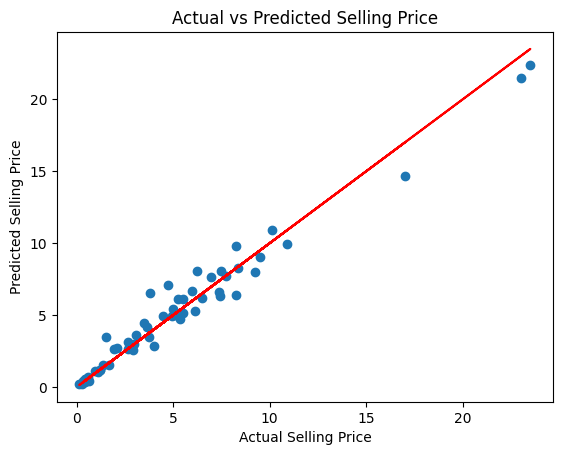

In [ ]:
plt.scatter(y_test, y_pred)

plt.plot(y_test, y_test, color='red')

plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.show()

Completion of the task, Thank you.